In [ ]:
plt.imshow(model.A[0:100,:100].detach().cpu().numpy())
plt.colorbar()
plt.show()

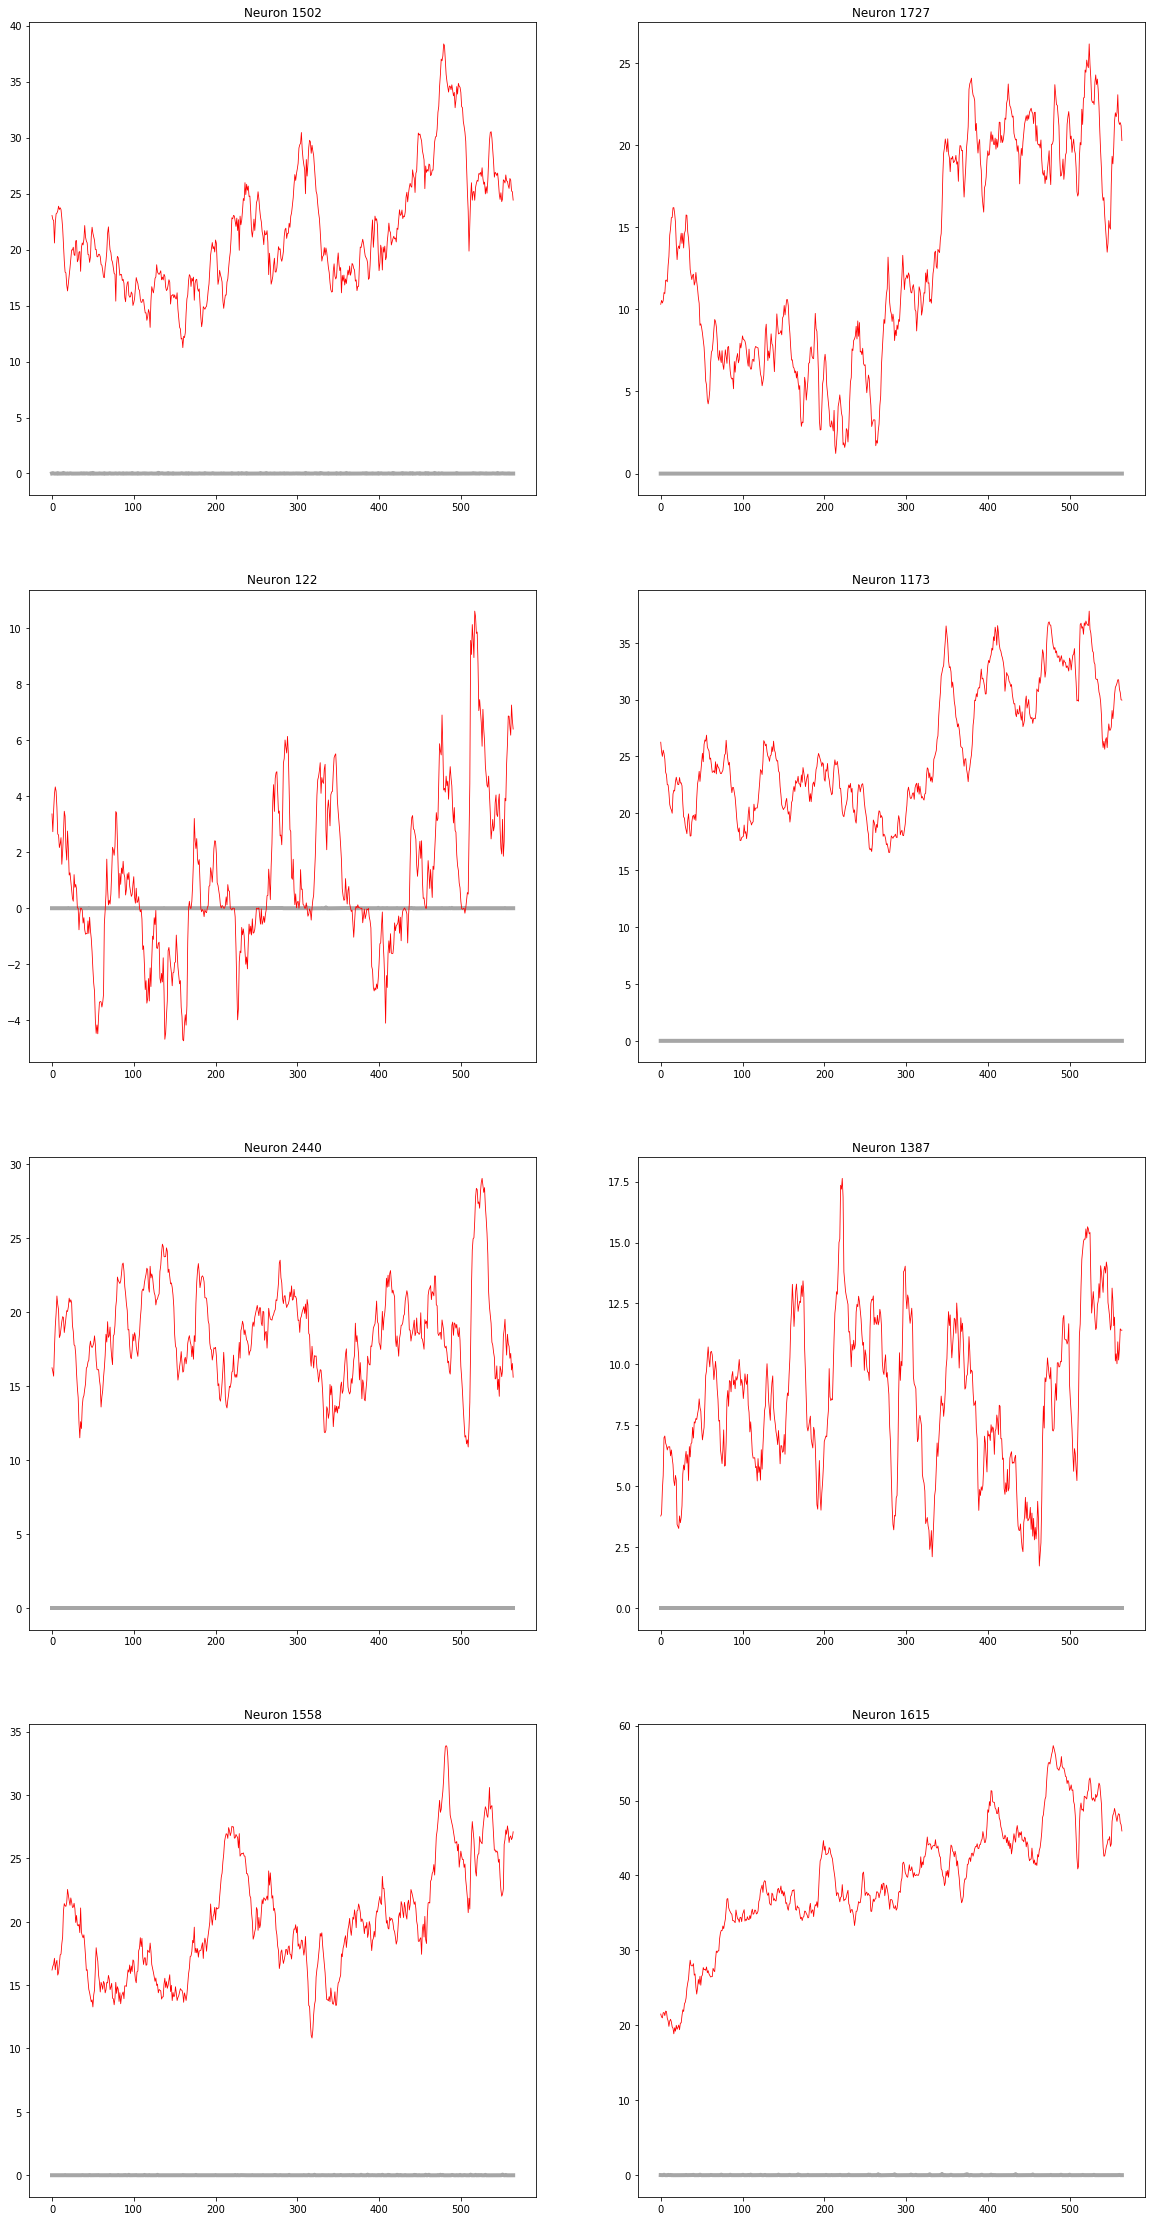

In [78]:
randModel = DynamicsSeq(data.nfeatures,n_future_steps)

U,P,X = test_data
# U,P,X = train_data
X_pred = randModel.predict(U,P,X[0],X)
dx_true = X[1:] - X[:-1]
dx_pred = X_pred[:-1] - X[:-1]

ncol, nrow = (2,4)
plt.close('all')
fig, ax = plt.subplots(nrow, ncol, figsize=(20,40))

# ax.set_ylabel("dx/dt")
# ax.set_xlabel("Time")
# ax.set_title("Training data")

for i in range(nrow):
    for j in range(ncol):
        n = np.random.randint(0,len(x_fish))
        ax[i,j].plot(dx_true[:,n].cpu().numpy(),color="gray", linewidth=4, alpha=0.7,label="Truth")
        ax[i,j].plot(dx_pred[:,n].cpu().numpy(),color='red', alpha=1,linewidth=0.8, label="Model")
        ax[i,j].set_title("Neuron {}".format(n))
fig

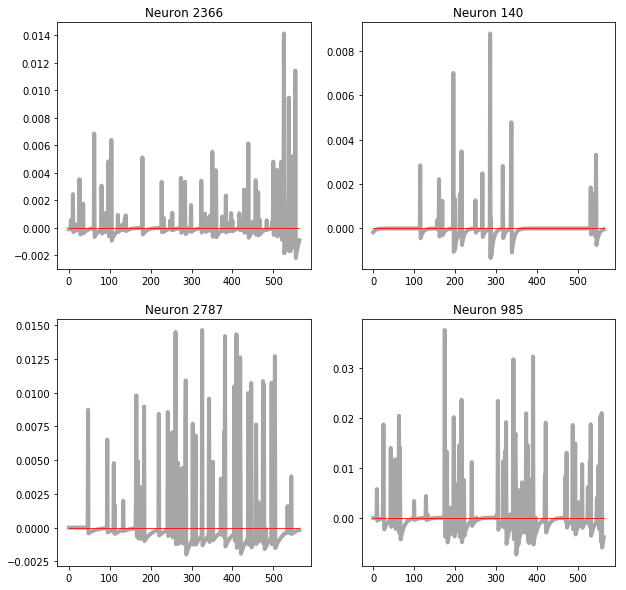

In [128]:
zeroModel = DynamicsSeq(data.nfeatures,n_future_steps)
zeroModel.A.data.zero_()
zeroModel.B.data.zero_()
zeroModel.C.data.zero_()

U,P,X = test_data
# U,P,X = train_data
X_pred = zeroModel.predict(U,P,X[0],X)
dx_true = X[1:] - X[:-1]
dx_pred = X_pred[:-1] - X[:-1]

ncol, nrow = (2,2)
plt.close('all')
fig, ax = plt.subplots(nrow, ncol, figsize=(5*ncol,5*nrow))

# ax.set_ylabel("dx/dt")
# ax.set_xlabel("Time")
# ax.set_title("Training data")

for i in range(nrow):
    for j in range(ncol):
        n = np.random.randint(0,len(x_fish))
        ax[i,j].plot(dx_true[:,n].cpu().numpy(),color="gray", linewidth=4, alpha=0.7,label="Truth")
        ax[i,j].plot(dx_pred[:,n].cpu().numpy(),color='red', alpha=1,linewidth=0.8, label="Model")
        ax[i,j].set_title("Neuron {}".format(n))
fig